In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [7]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [8]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X = pd.get_dummies(X, drop_first=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

In [11]:
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)) 

recall_scorer = make_scorer(recall_score, pos_label='Yes')

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

grid_model = GridSearchCV(ada_model, param_grid=param_grid, scoring=recall_scorer, cv=5)

In [12]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(recall_score, pos_label=Yes))

In [14]:
grid_model.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [15]:
y_pred = grid_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       517
         Yes       0.66      0.52      0.58       187

    accuracy                           0.80       704
   macro avg       0.75      0.71      0.73       704
weighted avg       0.79      0.80      0.79       704



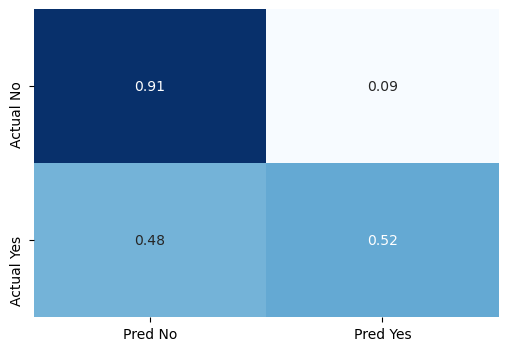

In [17]:
cm_normalize = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'], normalize='true')

cm_df = pd.DataFrame(cm_normalize,
                     index=['Actual No', 'Actual Yes'],
                     columns=['Pred No', 'Pred Yes'])

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)

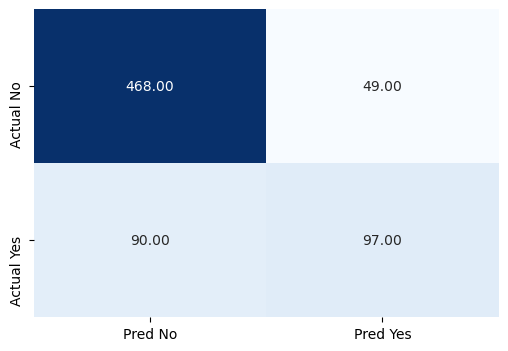

In [18]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index=['Actual No', 'Actual Yes'],
                     columns=['Pred No', 'Pred Yes'])

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)

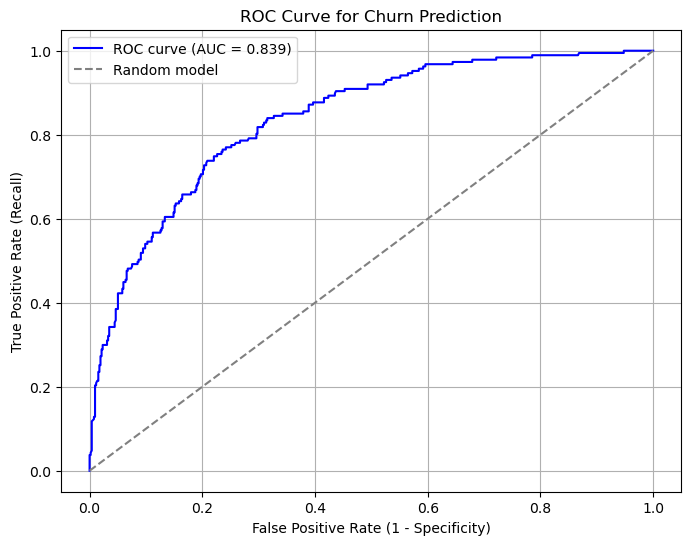

AUC Score: 0.839


In [19]:
y_proba = grid_model.best_estimator_.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='Yes')

auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Churn Prediction')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.3f}")